# **Part-1 Import the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Tenserflow version

In [4]:
tf.__version__

'2.6.0'

Keras version

In [5]:
keras.__version__

'2.6.0'

**Dataset**

In [6]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

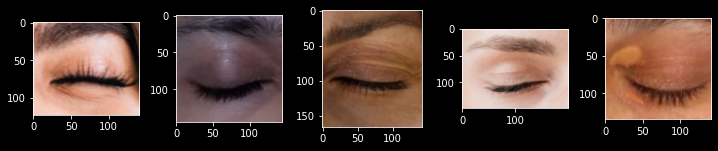

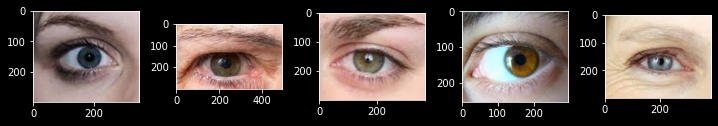

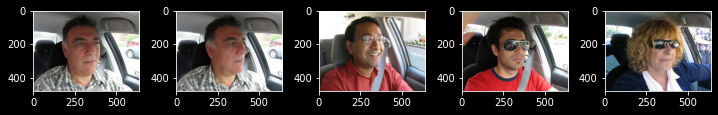

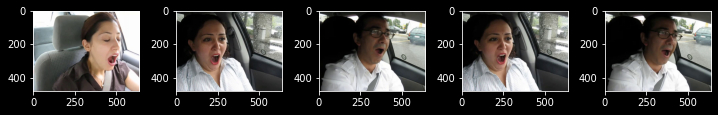

In [7]:
data_path = '/content/drive/MyDrive/dataset_new/train'

directories = ['/Closed', '/Open', '/no_yawn', '/yawn']

for j in directories:
    plot_imgs(data_path+j)

**Path of the Data**

In [8]:
train_data_path = '/content/drive/MyDrive/dataset_new/train'
test_data_path = '/content/drive/MyDrive/dataset_new/test'

# **Part-2 Data Preprocessing**

## Preprocessing for Training Set

In [9]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')


Found 2467 images belonging to 4 classes.


## Preprocessing for Testing Set

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 433 images belonging to 4 classes.


# **Part-3 Building the Model**

## Initialising the CNN

In [11]:
model = Sequential()

## Hidden layers 

**First hidden layer**

In [12]:
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

**Second hidden layer**

In [13]:
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

**Third hidden layer**

In [14]:
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

**Forth hidden layer**

In [15]:
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## Flattening

In [16]:
model.add(Flatten())

In [17]:
model.add(Dropout(0.5))

## Full Connection

In [18]:
model.add(Dense(64, activation="relu"))

## Output Layer

In [19]:
model.add(Dense(4, activation="softmax"))

## Summary / Information of the Model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       2

# **Part-4 Training the Model**

## Compiling the CNN

In [21]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [22]:
model_path="yawn_detection1.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

## Training the CNN on the Training set and evaluating it on the Test set

In [23]:
num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

history = model.fit(train_set, epochs = num_epochs, steps_per_epoch=training_steps, validation_data=test_set, validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
19/19 [==============================] - 411s 21s/step - loss: 1.1578 - accuracy: 0.4408 - val_loss: 0.9190 - val_accuracy: 0.6354

Epoch 00001: val_accuracy improved from -inf to 0.63542, saving model to yawn_detection1.h5
Epoch 2/10
19/19 [==============================] - 404s 21s/step - loss: 0.5464 - accuracy: 0.7401 - val_loss: 0.4936 - val_accuracy: 0.7682

Epoch 00002: val_accuracy improved from 0.63542 to 0.76823, saving model to yawn_detection1.h5
Epoch 3/10
19/19 [==============================] - 421s 22s/step - loss: 0.4496 - accuracy: 0.7790 - val_loss: 0.4913 - val_accuracy: 0.7917

Epoch 00003: val_accuracy improved from 0.76823 to 0.79167, saving model to yawn_detection1.h5
Epoch 4/10
19/19 [==============================] - 400s 21s/step - loss: 0.3862 - accuracy: 0.8085 - val_loss: 0.4289 - val_accuracy: 0.8073

Epoch 00004: val_accuracy improved from 0.79167 to 0.80729, saving model to yawn_detection1.h5
Epoch 5/10
19/19 [==============================] -

# **Part-5  Plotting the loss and accuracy for Model**

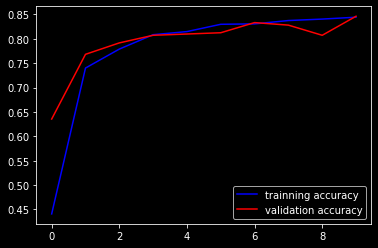

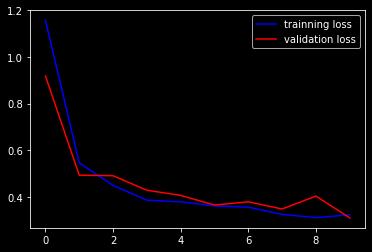

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# **Part-6 Save the Model**

In [25]:
model.save("drowiness_new6.h5")

In [26]:
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model/assets


In [27]:
import cv2

# **Part-7  Predict the Model on Test Set**

In [28]:
prediction = np.argmax(model.predict(test_set), axis=-1)

*   0 - yawn
*   1 - no_yawn
*   2 - closed
*   3 - open







In [29]:
prediction

array([1, 2, 1, 0, 3, 1, 1, 0, 0, 3, 2, 0, 3, 3, 0, 1, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 2, 2, 1, 3, 0, 2, 0, 1, 2, 2, 3, 1, 1, 0, 3, 0, 1,
       0, 2, 2, 1, 0, 1, 0, 2, 3, 3, 1, 0, 3, 3, 2, 1, 2, 2, 0, 1, 3, 0,
       2, 0, 2, 1, 3, 2, 3, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 3, 0, 0, 0,
       0, 1, 1, 2, 0, 3, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       3, 2, 1, 0, 3, 2, 2, 3, 1, 1, 2, 2, 1, 3, 1, 2, 1, 3, 3, 1, 2, 0,
       1, 1, 0, 3, 0, 0, 3, 0, 2, 3, 2, 1, 0, 3, 1, 1, 3, 2, 2, 3, 3, 1,
       1, 0, 0, 3, 3, 2, 3, 0, 0, 3, 2, 0, 1, 2, 2, 1, 0, 0, 0, 3, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 3, 2, 0, 2, 3, 2, 1, 1, 1, 0, 2, 3, 0, 3, 0,
       3, 2, 0, 2, 2, 1, 2, 1, 3, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1,
       0, 2, 0, 1, 2, 3, 3, 3, 3, 2, 2, 1, 2, 3, 1, 3, 0, 1, 0, 3, 1, 0,
       3, 0, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1,
       0, 1, 0, 2, 3, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 2, 2, 3, 0, 0, 2, 2, 3, 3,